# Exploratory Data analysis

About Dataset
Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

## Imports and settings

Import the libraries we'll use and set some display options for nicer outputs.

In [ ]:
! pip install plotly missingno

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import os
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from lifelines import CoxPHFitter, KaplanMeierFitter

## Load dataset

We'll load the Telco Customer Churn CSV that is in the `data/` folder and show shape and the first rows.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

csv_path = os.path.join("data", "WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = pd.read_csv(csv_path)

print("Dataset path:", csv_path)
print("Shape:", df.shape)

df.head()

In [ ]:
df_clean = df.copy()

df_clean["TotalCharges"] = df_clean["TotalCharges"].replace(" ", np.nan)
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

print("Missing TotalCharges after conversion:", df_clean["TotalCharges"].isna().sum())
if df_clean["TotalCharges"].isna().sum() > 0:
    display(df_clean[df_clean["TotalCharges"].isna()].head())

print("\nValue counts of tenure==0 among TotalCharges NA:")
print((df_clean[df_clean["TotalCharges"].isna()]["tenure"] == 0).sum())

df_clean["TotalCharges_filled"] = df_clean["TotalCharges"].fillna(
    df_clean["MonthlyCharges"] * df_clean["tenure"]
)

## Churn distribution and numeric variable plots

Explore churn counts and distributions for tenure, MonthlyCharges, and TotalCharges_filled.

Churn
No     5174
Yes    1869
Name: count, dtype: int64


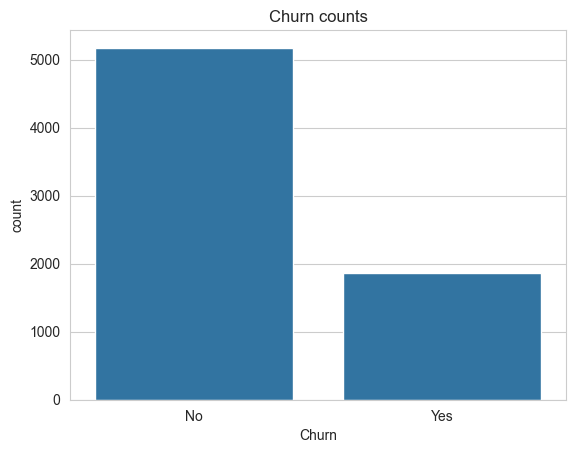

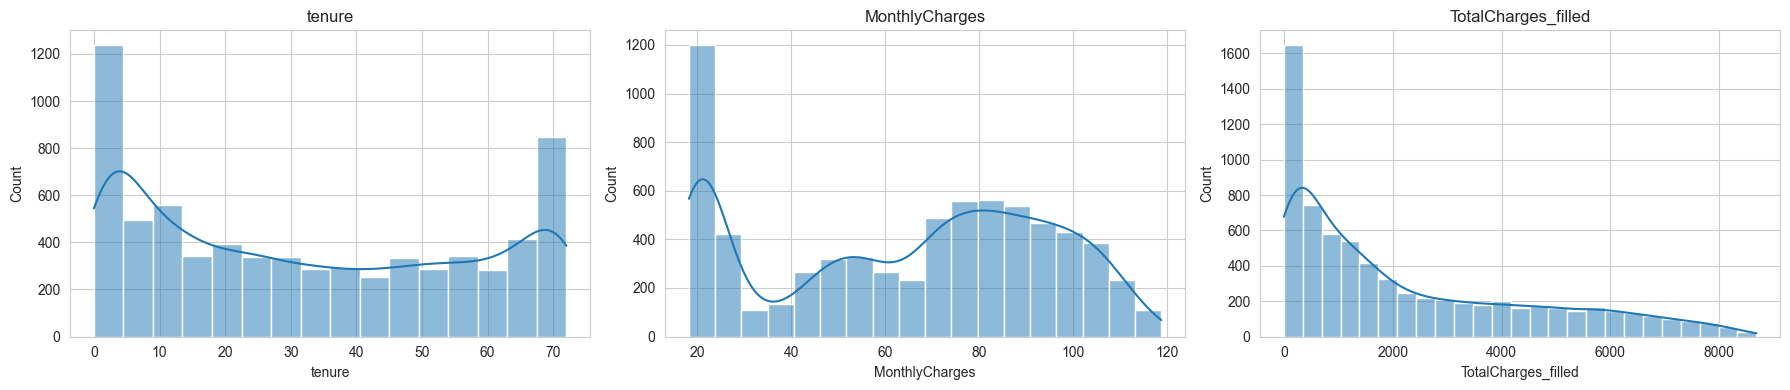

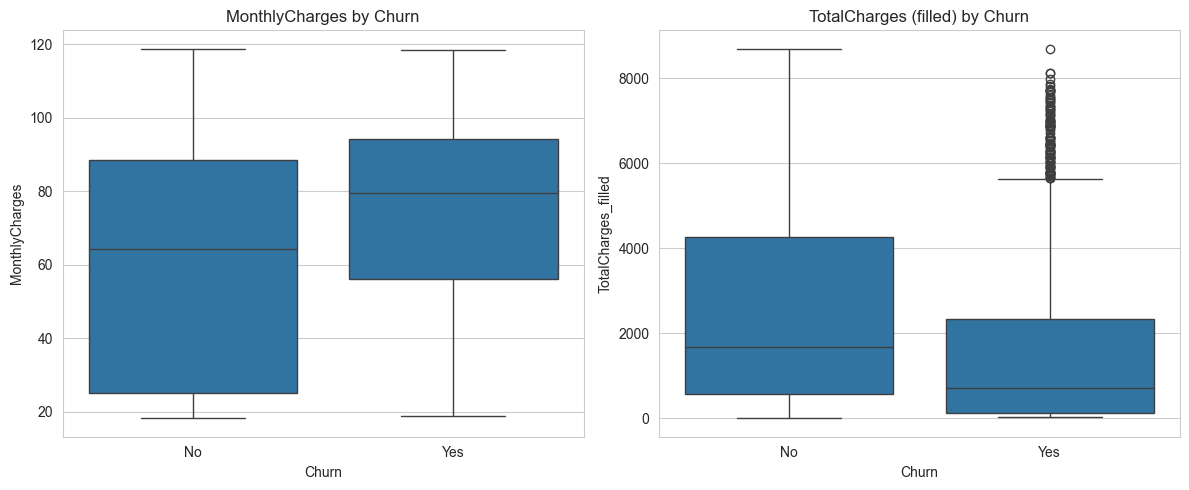

In [ ]:
print(df_clean["Churn"].value_counts())
ax = sns.countplot(data=df_clean, x="Churn")
ax.set_title("Churn counts")

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges_filled"]
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for col, ax in zip(numeric_cols, axes):
    sns.histplot(df_clean[col].dropna(), kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df_clean, ax=axes[0])
axes[0].set_title("MonthlyCharges by Churn")
sns.boxplot(x="Churn", y="TotalCharges_filled", data=df_clean, ax=axes[1])
axes[1].set_title("TotalCharges (filled) by Churn")
plt.tight_layout()

## Categorical counts (selected columns)

Plot counts for some important categorical variables: `Contract`, `PaymentMethod`, `InternetService`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`.

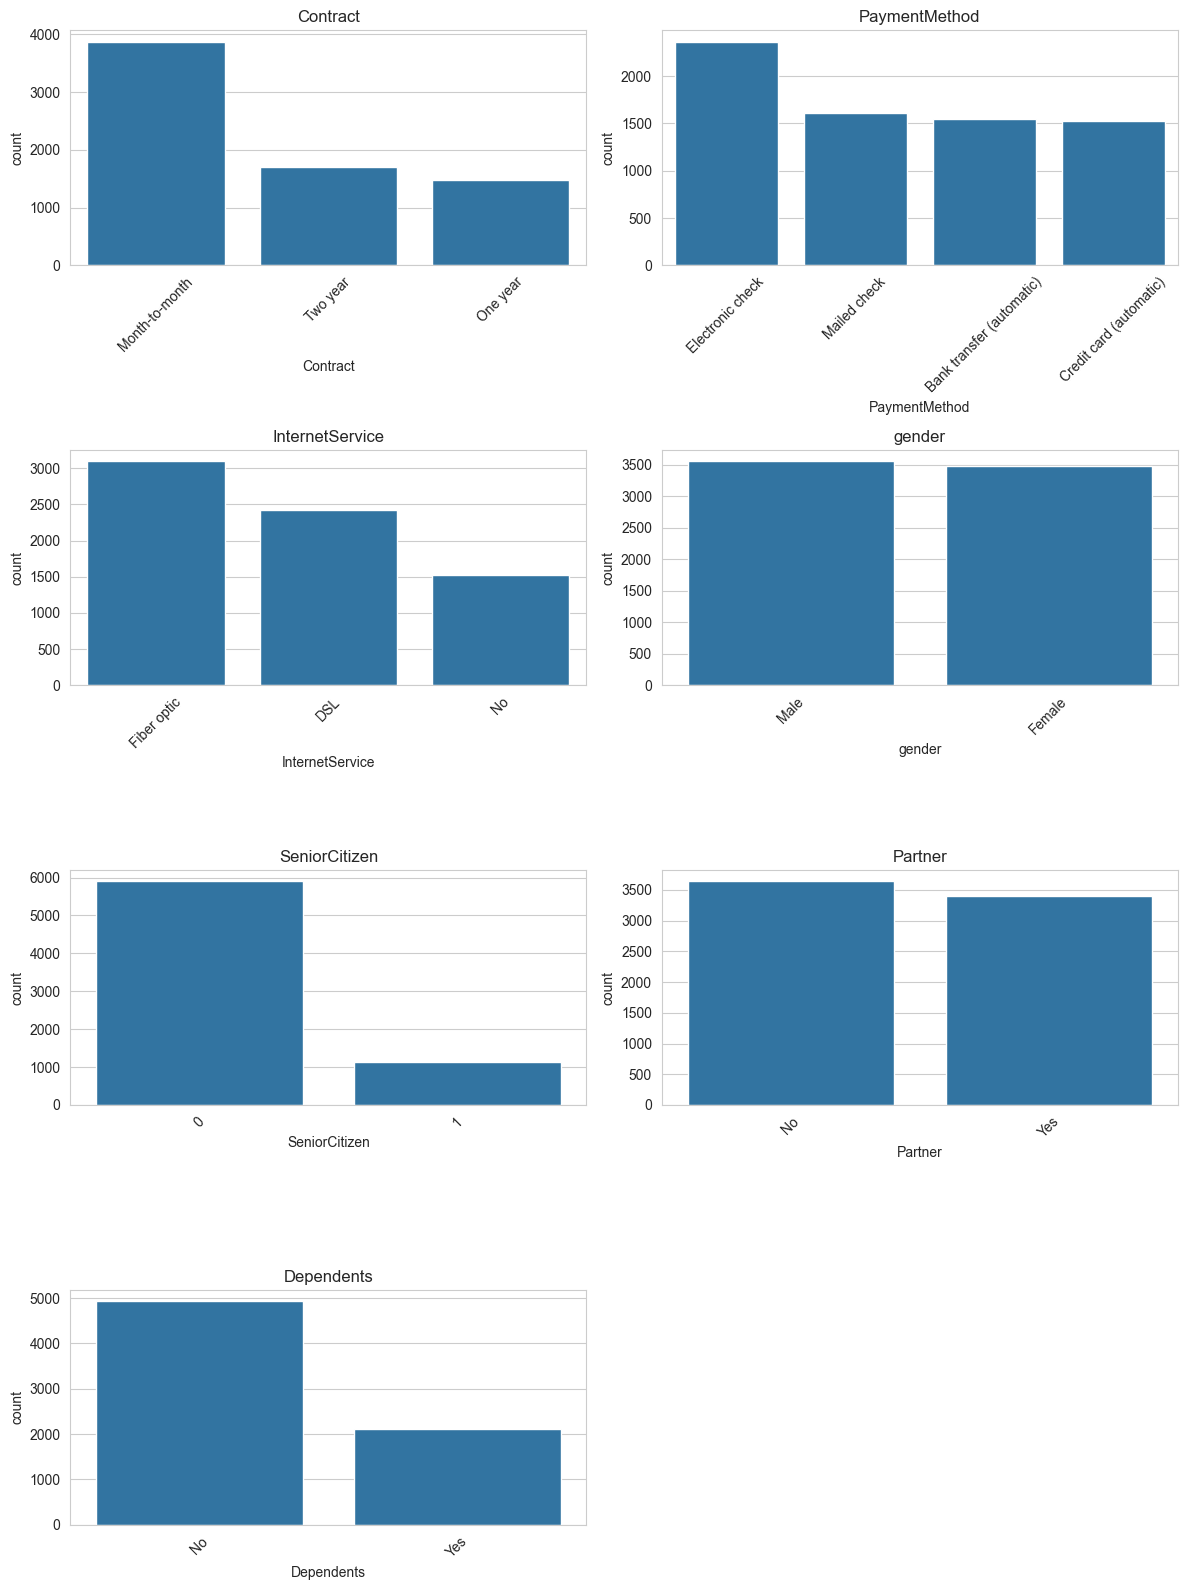

In [31]:
cat_cols = [
    "Contract",
    "PaymentMethod",
    "InternetService",
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
]

ncols = 2
nrows = int(np.ceil(len(cat_cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    order = df_clean[col].value_counts().index
    sns.countplot(data=df_clean, x=col, order=order, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis="x", rotation=45)

for ax in axes[len(cat_cols) :]:
    ax.set_visible(False)
plt.tight_layout()

## Correlation heatmap (numeric features)

Show correlations between numeric features (tenure, MonthlyCharges, TotalCharges_filled).

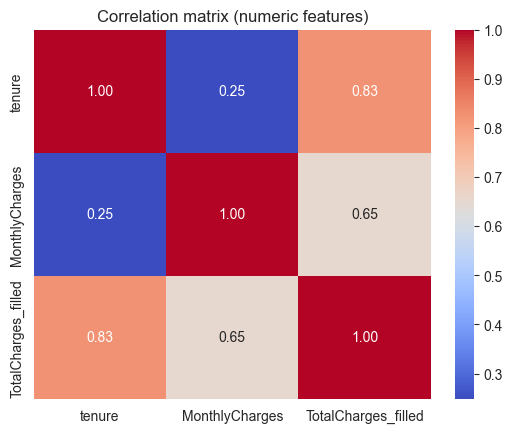

In [32]:
num_for_corr = ["tenure", "MonthlyCharges", "TotalCharges_filled"]
corr = df_clean[num_for_corr].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (numeric features)")
plt.show()